# Enzyme Kinetics: The Michaelis-Menten Mechanism

## Motivation

Enzymes are proteins that catalyze a wide variety of biochemical reactions.  These important molecules facilitate almost every important process in cellular biology.  The kinetics of these biological catalysts is of interest for understanding the basic science of how our body works as well as the design of novel industrial chemical syntheses.

## Learning Goals:

After working through these notes, you will be able to:

1. Delineate the steps and approximations in the Michaelis-Menten mechanism for enzyme kinetics.
2. Express the rate of change of reactant (/substrate) change in terms of Michaelis-Menten parameters.
3. Use a Lineweaver-Burk plot (/equation) to fit Michaelis-Menten parameters.
4. Describe how to setup an experiment to measure Michaelis-Menten parameters.

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Enzymes are Biological Catalysts

Enzyzmes are proteins that catalyze chemical reactions.  The type of reactions span the gamut of biochemical processes including almost every step of glycolysis to the hydrolysis of ATP in motor proteins.  Enzymes are known to speed-up chemical reactions by many orders of magnitude (as much as $10^5-10^{12}$).  

Without enzymes, life as we know it would not exist.  Processes would occur at rates far to slow to sustain life.  

So how do enzymes achieve such amazing speed-ups?

## Proposed Mechanism for Enzyme Catalysis: The Michaelis-Menten Mechanism

The most ubiquitous, and one of the simplest, mechanisms for enzyme catalysis was proposed my Leonor Michaelis and Maude Menten in 1913.  It is still the got to mechanism for fitting enzyme kinetics.  The derivation is as follows.

Consider a generic process of converting a substrate to a product with chemical reaction
\begin{equation}
S \underset{E}{\longrightarrow} P,
\end{equation}
where $S$ is the substrate (aka reactant), $E$ is the enzyme, and $P$ is the product.  It was found, experimentally, that many enzyme catalyzed reactions of this form followed the rate law 
\begin{equation}
-\frac{d[S]}{dt} = \frac{k[S]}{K+[S]}.
\end{equation}

Michealis and Menten proposed a two-step mechanism whereby the enzyme and substrate form an intermediate (called the enzyme-substrate complex) in a reversible reaction, followed by another reversible reaction in which the substrate is converted into product.  This can be written as
\begin{align}
E + S &\overset{k_1}{\underset{k_{-1}}{\overset{\Longrightarrow}{\Longleftarrow}}} ES \\
ES &\overset{k_2}{\underset{k_{-2}}{\overset{\Longrightarrow}{\Longleftarrow}}} E + P
\end{align}
Note that it is common to assume the second step is irreversible but it is not necessary to do so.  

The above mechansim leads to the following three differential equations
\begin{align}
-\frac{d[S]}{dt}  &= k_1[E][S] - k_{-1}[ES] \\
-\frac{d[ES]}{dt}  &= (k_2+k_{-1})[ES] - k_1[E][S] - k_{-2}[E][P] \\
\frac{d[P]}{dt} &= k_2[ES] - k_{-2}[E][P]
\end{align}
Because enzyme is not created or destroyed during the reaction, the overall concentration of enzyme containing species is fixed as the initial concentration of enzyme.  That is
\begin{equation}
[E]_0 = [E] + [ES]
\end{equation}
Substituting this into the differential equations above gives
\begin{align}
-\frac{d[S]}{dt}  &= k_1[E]_0[S] - (k_{-1}+k_1[S])[ES] \\
-\frac{d[ES]}{dt}  &= (k_1[S] + k_{-2}[P] + k_2+k_{-1})[ES] - k_1[E]_0[S] - k_{-2}[E]_0[P] \\
\frac{d[P]}{dt} &= (k_2+k_{-2}[P])[ES] - k_{-2}[E]_0[P]
\end{align}
These equations cannot be solved analytically for $[S]$, $[E]$, and/or $[P]$ without further approximation.  

*The first approximation employed is the steady-state approximation for $[ES]$.*  This approximation is typically valid after an intial phase of building up the $ES$ concentration when enzyme is mixed with excess substrate. After the initial lag phase, but before much substrate has been consumed and/or product has been formed, the steady-state approximation will be achieved yielding
\begin{eqnarray}
-\frac{d[ES]}{dt}  &\overset{s.s.}{=}& 0 = (k_1[S] + k_{-2}[P] + k_2+k_{-1})[ES] - k_1[E]_0[S] - k_{-2}[E]_0[P] \\
\Rightarrow [ES] &\overset{s.s.}{=}& \frac{(k_1[S]+k_{-2}[P])[E]_0}{k_1[S] + k_{-2}[P] + k_{-1} + k_2}.
\end{eqnarray}

Substituting the steady-state approximation for the concentration of the enzyme-substrate complex into the differential equation for substrate concentration yields
\begin{align}
-\frac{d[S]}{dt}  &= k_1[E]_0[S] - (k_{-1}+k_1[S])\frac{(k_1[S]+k_{-2}[P])[E]_0}{k_1[S] + k_{-2}[P] + k_{-1} + k_2} \\
&= k_1[E]_0[S]\frac{(k_1[S] + k_{-2}[P] + k_{-1} + k_2)}{k_1[S] + k_{-2}[P] + k_{-1} + k_2}  - (k_{-1}+k_1[S])\frac{(k_1[S]+k_{-2}[P])[E]_0}{k_1[S] + k_{-2}[P] + k_{-1} + k_2} \\
&= \frac{k_1[E]_0[S]k_1[S] + k_1[E]_0[S]k_{-2}[P] + k_1[E]_0[S]k_{-1} + k_1[E]_0[S]k_2 - k_{-1}k_1[S][E]_0 - k_{-1}k_{-2}[P][E]_0 -k_1[S]k_1[S][E]_0 - k_1[S] k_{-2}[P][E]_0}{k_1[S] + k_{-2}[P] + k_{-1} + k_2}\\
&= \frac{k_1k_2[E]_0[S] - k_{-1}k_{-2}[P][E]_0}{k_1[S] + k_{-2}[P] + k_{-1} + k_2}
\end{align}

If we now dictate that we will only measure the intitial rate of the reaction (post lag phase) and that there is only reactant/substrate present initially, then we can make the following approximations
\begin{align}
&[S] \approx [S]_0 \\
&[P] \approx [P]_0
\end{align}
Plugging in these approximations to the Michaelis-Menten rate equation yields
\begin{align}
v_0 = -\frac{d[S]}{dt}|_0 &= \frac{k_1k_2[E]_0[S]_0}{k_1[S]_0 + k_{-1} + k_2} \\
&= \frac{k_2[E]_0[S]_0}{K_m + [S]_0}
\end{align}
where the last equality holds true for $K_m = \frac{k_{-1} + k_2}{k_1}$.  This quantity is called the  *Michaelis-Menten constant* or the *Michaelis-Menten binding constant*.   Note that this quantity is ***not*** the equilibrium constant for the first step in the Michaelis-Menten mechanism.

We see an example plot of initial rate vs. initial substrate concentration below.

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/3685606058.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


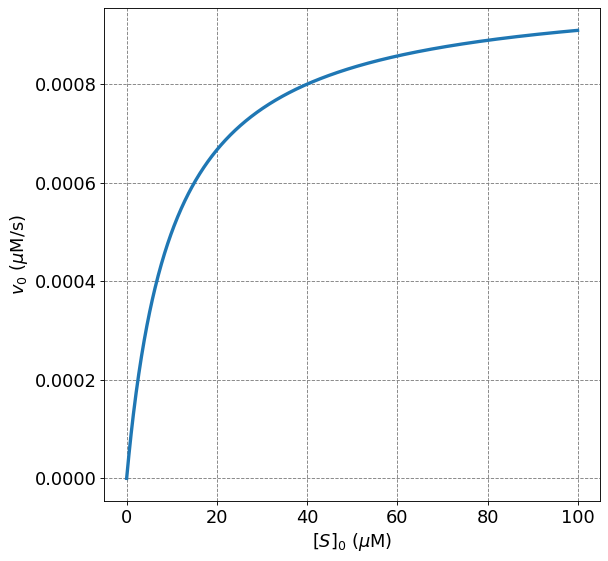

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ ($\mu$M)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def mm(S0,vmax,Km):  
    return vmax*S0/(Km + S0)
vmax = 0.001
Km = 10
S0 = np.arange(0,100,0.1)
ax.plot(S0,mm(S0,vmax,Km),lw=3)

We notice from the plot above that the initial rate saturates/plateaus as the initial substrate concentration is increased.  Indeed, it is readily shown that the maximum initial rate, denoted $v_{max}$, is 
\begin{eqnarray}
v_{max} = \lim_{[S]_0\rightarrow\infty} v_0 = k_2[E]_0
\end{eqnarray}

## Experiments to Measure Michaelis-Menten Parameters

For an enzyme catalyzed reaction that follows the Michaelis-Menten mechanism, the parameters $K_m$ and $v_{max}$ allow us to determine the rate of reaction at aribtraty substrate concentration.  These parameters can be compared amongst enzymes or across experimental conditions to assess the efficiency of an enzyme.  Indeed, these parameters are still estimated for a number of enzymes today.  

To consider how to design an experiment to estimate these parameters, we start writing out the chemical reaction 
\begin{equation}
S \underset{E}{\longrightarrow} P,
\end{equation}
and the associated Michaelis-Menten rate equation
\begin{align}
v_0 = \frac{v_{max}[S]_0}{K_m + [S]_0}
\end{align}

We need to measure $v_0$ as a function of $[S]_0$ to determine $v_{max}$ and $K_m$.  This can be done in a number of ways but there are two critical components:

1. Some way of measuring the initial rate of reaction.  The specifics of this measurement will depend on the reaction and reaction conditions.  An example might be absorbance spectroscopy - if the product absorbs light at a different frequency than the reactant, then measuring absorbance as a function of time will provide the appropriate information.
2. Performing multiple trials altering the initial concentration of substrate.

After these experiments, one will have concentration (or something proportional to concentration) as a function of initial concentration of substrate.  From here, it is a question of fitting the resulting data to the above equation for $v_0$ to determine v_{max}$ and $K_m$.  This can be done using a non-linear fit or using a Lineweaver-Burke plot.  

## Fitting Michaelis-Menten Parameters using a Lineweaver-Burk Plot

A Lineweaver-Burk plot is a plot of $\frac{1}{v_0}$ vs. $\frac{1}{[S]_0}$ and can be considered a linearized form of the Michaelis-Menten equation.  

To demonstrate this, we start with the Michaelis-Menten initial rate equation and take the reciprocal of both sides:
\begin{align}
v_0 &= \frac{v_{max}[S]_0}{K_m + [S]_0} \\
\Rightarrow \frac{1}{v_0} &= \frac{K_m + [S]_0}{v_{max}[S]_0} \\
&= \frac{K_m}{v_{max}}\frac{1}{[S]_0} + \frac{1}{v_{max}}
\end{align}

This last equation is known as the Lineweaver-Burk equation and demonstrates that $\frac{1}{v_0}$ will be linear with respect to $\frac{1}{[S]_0}$ for enzyme kinetics that is well modeled by the Michaelis-Menten mechanism.  The slope of the line will be $\frac{K_m}{v_{max}}$ and the intercept is $\frac{1}{v_{max}}$.

## The Importance of v/K

The value of $v_{max}/K_m$ (or, $k_2/K_m$), is a measure of the efficiency of an enzyme.   To see why this value is important, consider the MM rate law
\begin{equation}
v_0 = \frac{v_{max}[S]_0}{K_m + [S]_0}
\end{equation}
When $K_m >> [S]_0$, we have that 
\begin{equation}
v_0 \approx \frac{v_{max}}{K_m}[S]_0 = \frac{k_{2}}{K_m}[E]_0[S]_0
\end{equation}
or that the reaction is first order in substrate, first order in enzyme, and second order overall with observed rate constant of $\frac{k_2}{K_m}$.  

$\frac{k_2}{K_m}$ will have units of M$^{-1}\cdot$s$^{-1}$ and is related to the number of collisions that lead to reaction. The higher the value of  $\frac{k_2}{K_m}$ the more efficient the enzyme.  Value near $10^9$ are the maximum indicating that the reaction is diffusion controlled and thus effectively every collision leads to reaction.

## Comparing MM Parameters For Different Enzymes

Michaelis-Menten Parameter are tabulated for various enzymes.  These can be compared to assess the relative efficiency of these enzymes.

| Enzyme  |  Substrate | $K_m$ (M) | $k_{2}$ (s$^{-1}$) | $\frac{k_2}{K_m}$ (M$^{-1}\cdot$s$^{-1}$) |
| :-----  | :--------- | :-------- | :----------------- | :-------------------------------         |
| Acetylcholineterase | Acetylcholine | $9.5\times10^{-5}$ | $1.4\times10^4$ | $1.5\times10^8$ |
| Carbonic anhydrase | CO$_2$ | $1.2\times10^{-2}$ | $1.0\times10^6$ | $8.3\times10^7$ |
| Carbonic anhydrase | HCO$_3^-$ | $2.6\times10^{-2}$ | $4.0\times10^5$ | $1.5\times10^7$ |
| Catalase | H$_2$O$_2$ | $2.5\times10^{-2}$ | $1.0\times10^7$ | $4.0\times10^8$ |

In the table above we see various examples of enzymes substrate pairs and their associated Michaelis-Menten parameters.  Carbonic anhydrase, for example, can bind either CO$_2$ or HCO$_3^-$ and has different MM parameters for those substrates.  As a summary, the enzymative efficiency ($\frac{k_2}{K_m}$) of Carbonic anhydrase is larger for CO$_2$ as a substrate as compared to HCO$_3^-$.

## Example: Fitting Michaelis-Menten Parameters

Determine the Michaelis-Menten Paramters from the following data

| $[S]_0$ (mM) | $v_0$ ($\mu$M/s) |
| :----------- | :--------------- |
|   1          | 2.5              |
|   2          | 4.0              |
| 5            | 6.3              |
| 10           | 7.6              |
| 20           | 9.0              |

### Solution: Non-linear Fitting

We will simply solve this by performing a non-linear fit to the Michaelis-Menten parameters.  We start by entering the data into arrays and plotting it.

In [2]:
# Put the data into numpy arrays
import numpy as np
s0 = np.array([1,2,5,10,20.0])
v0 = np.array([2.5,4.0,6.3,7.6,9.0])

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/534359523.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


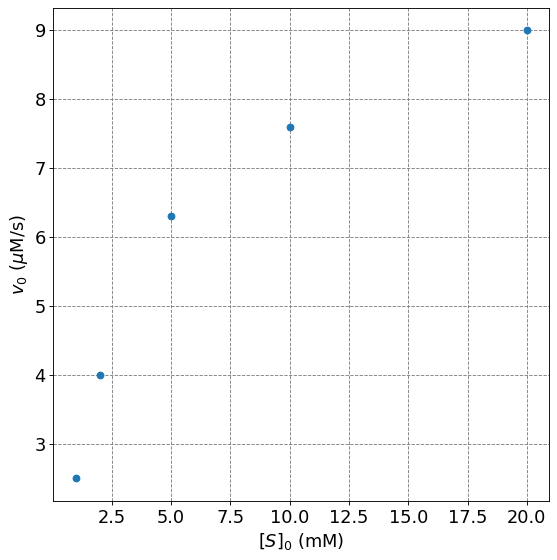

In [3]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(s0,v0,'o',lw=2)

In [4]:
# perform non-linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def mm(s,vmax,Km):  
    return vmax*s/(Km + s)
# make an initial guess of parameters
x0 = np.array([1.0,1.0])
popt, pcov = curve_fit(mm, s0, v0)
err = np.sqrt(np.diag(pcov))
print("v_max = ", np.round(popt[0],1),"+/-", np.round(err[0],1), "muM/s")
print("Km = ", np.round(popt[1],1),"+/-", np.round(err[1],1), "mM")

v_max =  10.3 +/- 0.2 muM/s
Km =  3.2 +/- 0.2 mM


/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/3342227737.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


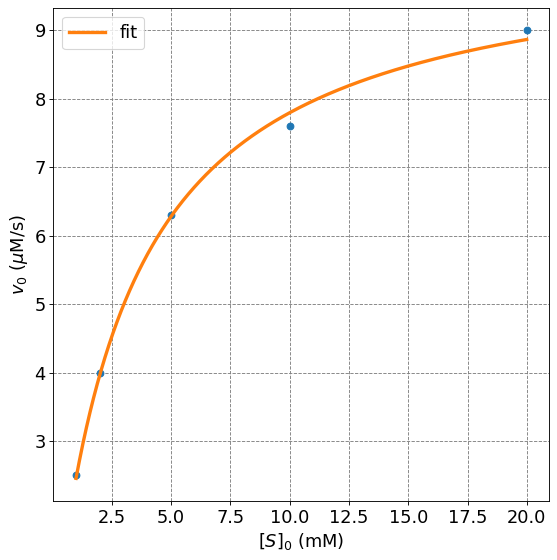

In [5]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(s0,v0,'o',lw=2)
s = np.arange(np.amin(s0),np.amax(s0),0.01)
ax.plot(s,mm(s,popt[0],popt[1]),lw=3,label="fit")
plt.legend(fontsize=fontsize)

### Solution: Lineweaver-Burk Plot

In this solution we will plot $1/v_0$ vs $1/[S]_0$ and fit the resulting data to a line.

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/886581070.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


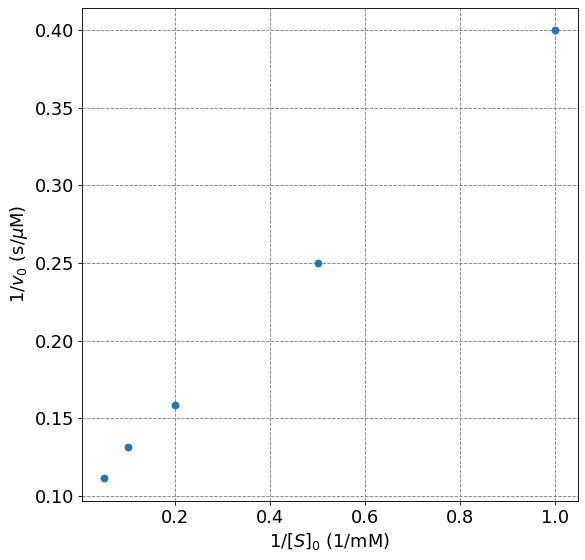

In [6]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$1/v_0$ (s/$\mu$M)",size=fontsize)
ax.set_xlabel("$1/[S]_0$ (1/mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(1/s0,1/v0,'o',lw=2)

Fit the line to get the MM parameters:

In [7]:
# perform linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def mm_lineweaver_burke(s,m,b):  
    return m*s + b
# make an initial guess of parameters
popt_lwb, pcov = curve_fit(mm_lineweaver_burke, 1/s0, 1/v0)
err_lwb = np.sqrt(np.diag(pcov))
vmax_lwb = 1/popt_lwb[1]
vmax_lwb_err = vmax_lwb*err_lwb[1]/popt_lwb[1]
Km_lwb = popt_lwb[0]/popt_lwb[1]
Km_lwb_err = Km_lwb*np.sqrt( (err_lwb[0]/popt_lwb[0])**2 + (err_lwb[1]/popt_lwb[1])**2)
print("v_max = ", np.round(vmax_lwb,1),"+/-", np.round(vmax_lwb_err,1), "muM/s")
print("Km = ", np.round(Km_lwb,1),"+/-", np.round(Km_lwb_err,1), "mM")

v_max =  10.1 +/- 0.1 muM/s
Km =  3.1 +/- 0.1 mM


Plot the resulting Lineweaver-Burk plot:

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/2333184454.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


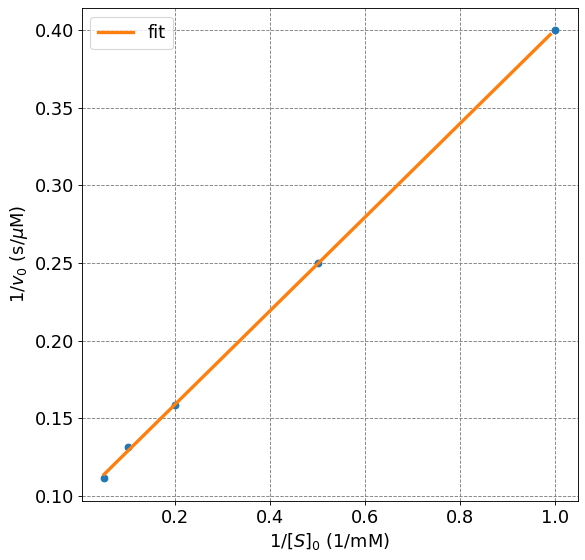

In [8]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$1/v_0$ (s/$\mu$M)",size=fontsize)
ax.set_xlabel("$1/[S]_0$ (1/mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(1/s0,1/v0,'o',lw=2)
s = np.arange(np.amin(1/s0),np.amax(1/s0),0.01)
ax.plot(s,mm_lineweaver_burke(s,popt_lwb[0],popt_lwb[1]),lw=3,label="fit")
plt.legend(fontsize=fontsize)

### Compare Solutions

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/382201956.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


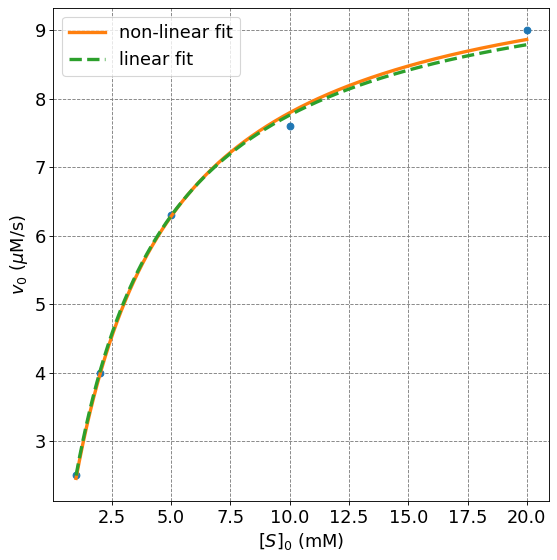

In [9]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
ax.plot(s0,v0,'o',lw=2)
s = np.arange(np.amin(s0),np.amax(s0),0.01)
ax.plot(s,mm(s,popt[0],popt[1]),lw=3,label="non-linear fit")
ax.plot(s,mm(s,vmax_lwb,Km_lwb),'--',lw=3,label="linear fit")
plt.legend(fontsize=fontsize)

## Example: Fitting with Error

Here we consider fitting MM parameters using either the Lineweaver-Burk linearization or non-linear regression.  Which method is better?  To investigate this, we generate a set of fake data using a known $K_m$ and $v_{max}$ and then fit the data using both approaches.

Below is a piece of code that will generate a fake data set for initial concentrations of $1, 2, 5, 10, 20$ mM.  We will use Michaelis-Menten parameters of
\begin{align}
V_{max} &= 7.5 \text{ }\mu\text{M}\cdot\text{s}^{-1}\\
K_m &= 4.0 \text{ mM}
\end{align}

In [10]:
from tabulate import tabulate
s0 = np.array([1,2,5,10,20.0])
# Generate a data set
def mm_from_params(S0,vmax,Km):  
    return vmax*S0/(Km + S0)
vmax = 7.5
Km = 4.0
truth = mm_from_params(s0,vmax,Km)
n_trials = 5
data = np.empty((truth.shape[0],n_trials))
s0_total = np.empty((s0.shape[0],n_trials))
for i in range(n_trials):
    # estimate error based on normal distribution 99.9% data within 7.5%
    error = np.random.normal(0,0.03,truth.shape[0])
    # estimate error from uniform distribution with maximum value of 5%
    #error = 0.1*(np.random.rand(truth.shape[0])-0.5)
    # generate data by adding error to truth
    data[:,i] = truth*(1+error)
    # keep flattened s0 array
    s0_total[:,i] = s0
combined_data = np.column_stack((s0,data))
print(tabulate(combined_data,headers=["[S]0","Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5"]))

  [S]0    Trial 1    Trial 2    Trial 3    Trial 4    Trial 5
------  ---------  ---------  ---------  ---------  ---------
     1    1.54253    1.47579    1.45459    1.5722     1.48896
     2    2.62632    2.47554    2.45808    2.51567    2.48791
     5    4.05801    4.35793    4.28324    4.04551    4.17699
    10    5.22419    5.09721    5.32373    5.34492    5.3389
    20    6.05224    5.96944    6.16534    5.80238    5.84462


The data in both standard and linear form look like:

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/372459278.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/372459278.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


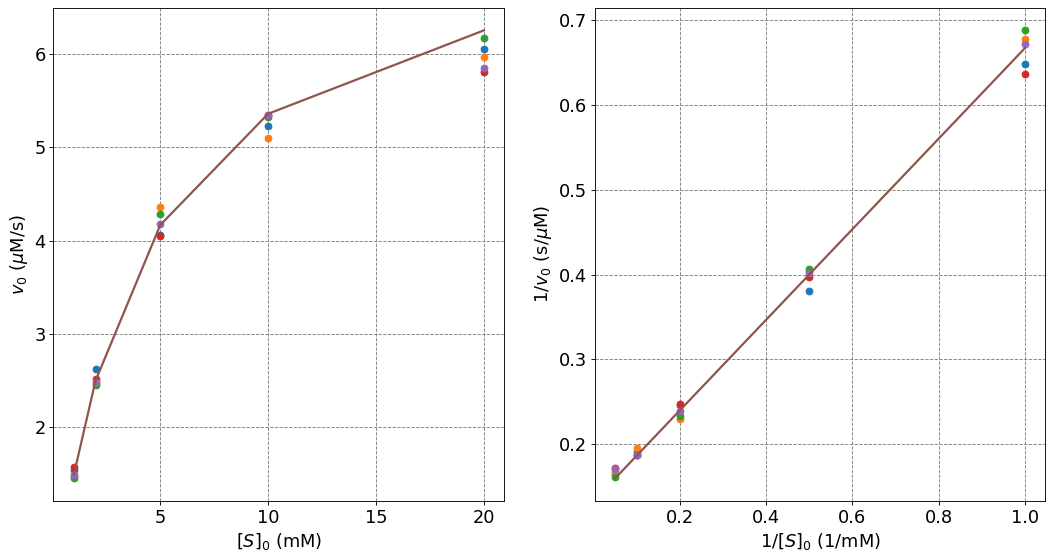

In [11]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig, ax = plt.subplots(1,2,figsize=(16,8), dpi= 80, facecolor='w', edgecolor='k')
ax[0].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax[0].set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax[0].set_xlabel("$[S]_0$ (mM)",size=fontsize)
ax[0].tick_params(axis='both',labelsize=fontsize)
for i in range(n_trials):
    ax[0].plot(s0,data[:,i],'o')
ax[0].plot(s0,truth,'-',lw=2,label="Truth")
ax[1].grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax[1].set_ylabel("$1/v_0$ (s/$\mu$M)",size=fontsize)
ax[1].set_xlabel("$1/[S]_0$ (1/mM)",size=fontsize)
ax[1].tick_params(axis='both',labelsize=fontsize)
for i in range(n_trials):
    ax[1].plot(1/s0,1/data[:,i],'o')
ax[1].plot(1/s0,1/truth,'-',lw=2,label="Truth")

Now to perform the fits.  We start with the linear least-squares using the Lineweaver-Burk formulation.

In [12]:
# perform linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def mm_lineweaver_burke(s,m,b):  
    return m*s + b
# make an initial guess of parameters
popt_lwb, pcov = curve_fit(mm_lineweaver_burke, 1/s0_total.flatten(), 1/data.flatten())
err_lwb = np.sqrt(np.diag(pcov))
vmax_lwb = 1/popt_lwb[1]
vmax_lwb_err = vmax_lwb*err_lwb[1]/popt_lwb[1]
Km_lwb = popt_lwb[0]/popt_lwb[1]
Km_lwb_err = Km_lwb*np.sqrt( (err_lwb[0]/popt_lwb[0])**2 + (err_lwb[1]/popt_lwb[1])**2)
print("v_max = ", np.round(vmax_lwb,1),"+/-", np.round(vmax_lwb_err,1), "muM/s")
print("Km = ", np.round(Km_lwb,1),"+/-", np.round(Km_lwb_err,1), "mM")

v_max =  7.3 +/- 0.2 muM/s
Km =  3.8 +/- 0.1 mM


Now we perform non-linear least squares using the standard Michaelis-Menten rate equation.

In [13]:
# perform non-linear fit
# import least squares function from scipy library
from scipy.optimize import curve_fit
# define Michaelis-Menten function
def mm(s,vmax,Km):  
    return vmax*s/(Km + s)
# make an initial guess of parameters
x0 = np.array([1.0,1.0])
popt, pcov = curve_fit(mm, s0_total.flatten(), data.flatten())
err = np.sqrt(np.diag(pcov))
print("v_max = ", np.round(popt[0],1),"+/-", np.round(err[0],1), "muM/s")
print("Km = ", np.round(popt[1],1),"+/-", np.round(err[1],1), "mM")

v_max =  7.1 +/- 0.1 muM/s
Km =  3.6 +/- 0.1 mM


You can see that both methods produce reasonable results.  They can be compared visually by looking at the plot.

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_48905/3111502636.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


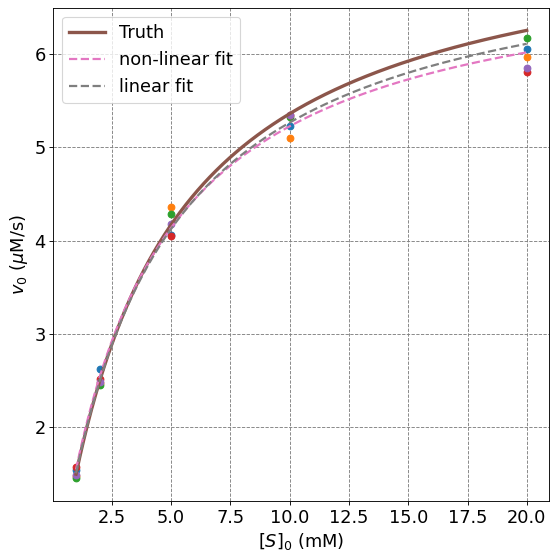

In [14]:
# plot data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_ylabel("$v_0$ ($\mu$M/s)",size=fontsize)
ax.set_xlabel("$[S]_0$ (mM)",size=fontsize)
ax.tick_params(axis='both',labelsize=fontsize)
for i in range(n_trials):
    ax.plot(s0,data[:,i],'o')
s = np.arange(1,20,0.01)
ax.plot(s,mm(s,vmax,Km),'-',lw=3,label="Truth")
ax.plot(s,mm(s,popt[0],popt[1]),'--',lw=2,label="non-linear fit")
ax.plot(s,mm(s,vmax_lwb,Km_lwb),'--',lw=2,label="linear fit")
plt.legend(fontsize=fontsize)